<a href="https://colab.research.google.com/github/inathanms/Evolucao_Software_2025-2_goose/blob/main/Evolucao_Software_2025_2_goose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1 - Evolução de Software

## Configurar acesso à API do GitHub

Obter um token de acesso pessoal do GitHub com as permissões necessárias para ler os dados do repositório.

## Obter pull requests fechados

Use a API do GitHub para recuperar os últimos 100 pull requests fechados do repositório `block/goose`.

In [ ]:
import requests
from google.colab import userdata

# Define the repository details
repo_owner = "block"
repo_name = "goose"

# GitHub API endpoint for pull requests
api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/pulls"

# Get GitHub token from environment variable
github_token = userdata.get("GITHUB_ACCESS_TOKEN")

# Set up the request parameters
params = {
    "state": "closed",
    "per_page": 100,
    "sort": "created",
    "direction": "desc"
}

# Set up the request headers with authentication
headers = {
    "Authorization": f"token {github_token}",
    "Accept": "application/vnd.github.v3+json"
}

# Make the GET request to the GitHub API
response = requests.get(api_url, params=params, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    closed_pull_requests = response.json()
    print(f"Successfully retrieved {len(closed_pull_requests)} closed pull requests.")
else:
    print(f"Error: {response.status_code} - {response.text}")
    closed_pull_requests = []
closed_pull_requests

Successfully retrieved 100 closed pull requests.


[{'url': 'https://api.github.com/repos/block/goose/pulls/5518',
  'id': 2968270310,
  'node_id': 'PR_kwDOMneZ986w7DXm',
  'html_url': 'https://github.com/block/goose/pull/5518',
  'diff_url': 'https://github.com/block/goose/pull/5518.diff',
  'patch_url': 'https://github.com/block/goose/pull/5518.patch',
  'issue_url': 'https://api.github.com/repos/block/goose/issues/5518',
  'number': 5518,
  'state': 'closed',
  'locked': False,
  'title': 'fix: adds ProviderRetry to openai provider',
  'user': {'login': 'myaple',
   'id': 10523487,
   'node_id': 'MDQ6VXNlcjEwNTIzNDg3',
   'avatar_url': 'https://avatars.githubusercontent.com/u/10523487?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/myaple',
   'html_url': 'https://github.com/myaple',
   'followers_url': 'https://api.github.com/users/myaple/followers',
   'following_url': 'https://api.github.com/users/myaple/following{/other_user}',
   'gists_url': 'https://api.github.com/users/myaple/gists{/gist_id}',
   'starred

## Obter comentários para cada PR

Para cada pull request recuperado, obter seus comentários usando a API do GitHub.


In [2]:
all_comments = []

if closed_pull_requests:
    for pr in closed_pull_requests:
        # Fetch regular comments
        comments_url = pr["_links"]["comments"]["href"]
        comments_response = requests.get(comments_url, headers=headers)

        if comments_response.status_code == 200:
            all_comments.extend(comments_response.json())
        else:
            print(f"Error fetching comments for PR {pr['number']}: {comments_response.status_code} - {comments_response.text}")

        # Fetch review comments
        review_comments_url = pr["_links"]["review_comments"]["href"]
        review_comments_response = requests.get(review_comments_url, headers=headers)

        if review_comments_response.status_code == 200:
            all_comments.extend(review_comments_response.json())
        else:
            print(f"Error fetching review comments for PR {pr['number']}: {review_comments_response.status_code} - {review_comments_response.text}")
else:
    print("No closed pull requests were retrieved in the previous step.")

## Filtrar comentários de bots

Identificar e remover comentários feitos por bots.

In [3]:
human_comments = [comment for comment in all_comments if comment['user']['type'] != 'Bot']

print(f"Filtered out {len(all_comments) - len(human_comments)} bot comments.")

Filtered out 72 bot comments.


## Extrair e armazenar comentários

Coletar o texto dos comentários restantes em uma lista.

In [4]:
comment_texts = [comment['body'] for comment in human_comments]

print(f"Extracted {len(comment_texts)} human comments.")

Extracted 194 human comments.


## Substituir abreviações de comentários

Substituir as abreviaturas especificadas nos comentários coletados por seus nomes completos.

In [5]:
acronym_map = {
    "WIP": "Work In Progress",
    "LGTM": "Looks Good To Me",
    "PR": "Pull Request",
    "MR": "Merge Request",
    "IMO": "In My Opinion",
    "IMHO": "In My Humble Opinion",
    "AFAIK": "As Far As I Know",
    "FYI": "For Your Information",
    "Nit": "Nitpick",
    "TL;DR": "Too Long; Didn't Read",
    "TBD": "To Be Defined / To Be Determined",
    "ACK": "Acknowledge",
    "PTAL": "Please Take Another Look"
}

mapped_comments = []
for comment in comment_texts:
    mapped_comment = comment
    for acronym, full_form in acronym_map.items():
        import re
        mapped_comment = re.sub(r'\b' + re.escape(acronym) + r'\b', full_form, mapped_comment, flags=re.IGNORECASE)
    mapped_comments.append(mapped_comment)

print("Mapped acronyms in comments.")

Mapped acronyms in comments.


In [6]:
# Truncar comentários para um comprimento máximo que o modelo possa processar
# A mensagem de erro sugere um limite em torno de 512 caracteres, mas o modelo específico pode ter um limite ligeiramente diferente.
# Vamos definir um limite mais conservador para evitar o erro.
max_comment_length = 512
truncated_comments = [comment[:max_comment_length] for comment in mapped_comments]

print(f"Truncated {len(truncated_comments)} comments to a maximum length of {max_comment_length} characters.")

Truncated 194 comments to a maximum length of 512 characters.


## Exibir resultados

Exibir a lista de comentários processados.

In [7]:
for comment in truncated_comments:
    print("\n-----\n")
    print(comment)


-----

> Oh, wow, nice catch. I did not know we didn't have this in openai

Thanks! Yeah, we have a really unreliable api provider and I always wondered why goose didnt auto retry on a 429 or similar, finally decided to look. Glad it was an easy fix. 



-----

merged!

-----

Thanks @aharvard !

-----

This is my previous Pull Request before noticing a merge conflict @taniandjerry. I have attempted to fix the tags being incorrect from my end and also attempted to push the most recent code changes. 

-----

this is the config file set up:

```
~/.config/goose/
├── config.yaml              # Provider, model, extensions, general settings
├── permission.yaml          # Tool permission levels (user-configured)
├── secrets.yaml             # Secrets (when keyring is disabled)
└── permissions/             # Runtime permission decisions (auto-managed)
    └── tool_permissions.json
 ```

-----

**You have a DCO check failing. Here's[ how to fix](https://github.com/block/goose/pull/5503/checks

Realizar uma análise de sentimento na coluna `processed_comments` do DataFrame usando a biblioteca `transformers` do Hugging Face.

## Instalar as bibliotecas necessárias

Instalar a biblioteca `transformers` da Hugging Face.

In [8]:
%pip install transformers

**Reasoning**:
Import the necessary function and create the sentiment analysis pipeline.



## Realizar análise de sentimento

Iterar pelos comentários processados ​​e usar o modelo carregado para prever o sentimento de cada comentário.

In [9]:
def perform_sentiment_analysis(comments, pipeline):
    sentiments = []
    scores = []

    for comment in truncated_comments:
        # O pipeline retorna uma lista de dicionários, por exemplo, [{'label': 'POSITIVE', 'score': 0.99}]
        result = pipeline(comment)
        # Extrair o 'rótulo' e a 'pontuação' do resultado
        sentiment_label = result[0]['label']
        sentiment_score = result[0]['score']
        sentiments.append(sentiment_label)
        scores.append(sentiment_score)

    return sentiments, scores

    print(f"Performed sentiment analysis on {len(sentiments)} comments.")

## Exibir resultados

Mostrar os comentários juntamente com o sentimento previsto.

In [ ]:
from google.colab import files


uploaded = files.upload()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ler o arquivo CSV 
df = pd.read_csv("Evo.csv", sep=',', engine='python')

# 
contagem = df['Sentiment'].value_counts()

# plotar o gráfico           -
plt.figure(figsize=(6, 4))
contagem.plot(kind='bar', color=['green', 'red', 'gray'])

plt.title("Distribuição de Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade de Comentários")


for i, v in enumerate(contagem):
    plt.text(i, v + 0.2, str(v), ha='center', fontweight='bold')

plt.tight_layout()


plt.savefig("grafico_sentimentos.png")

plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_distribution(sentiments, scores):
    # Criar um DataFrame para armazenar comentários, sentimentos e pontuações
    sentiment_df = pd.DataFrame({
        'comment': truncated_comments,
        'sentiment': sentiments,
        'score': scores
    })

    # Calcular a pontuação média de sentimento
    average_score = sentiment_df['score'].mean()
    print(f"Overall average sentiment score: {average_score:.4f}")

    # Calcular a pontuação média de sentimento para cada tipo de sentimento
    average_scores_by_sentiment = sentiment_df.groupby('sentiment')['score'].mean()
    print("\nAverage sentiment score by sentiment type:")
    display(average_scores_by_sentiment)

    # Visualizar a distribuição dos rótulos de sentimento
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')
    plt.title('Distribution of Sentiment Labels')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    print("")

    # Visualizar a distribuição das pontuações de sentimento
    plt.figure(figsize=(8, 6))
    sns.histplot(sentiment_df['score'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

### cardiffnlp/twitter-roberta-base-sentiment-latest

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


Overall average sentiment score: 0.7334

Average sentiment score by sentiment type:


,score
sentiment,
negative,0.660115
neutral,0.730606
positive,0.787691


/tmp/ipython-input-232627265.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')


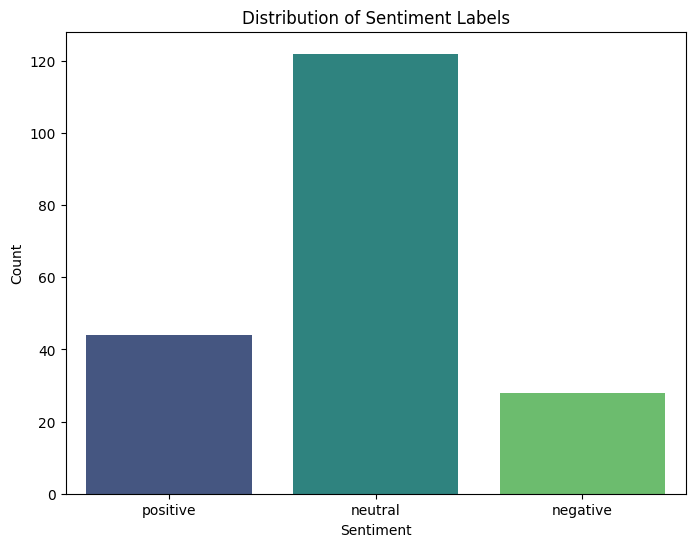

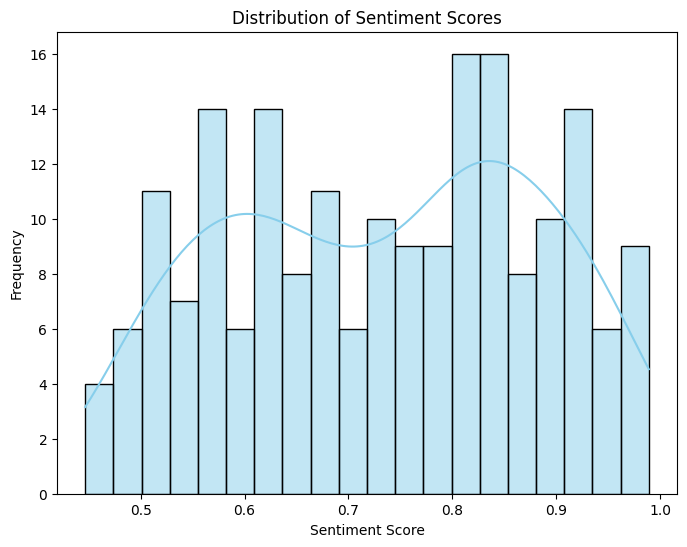

In [11]:
from transformers import pipeline

sentiment_analyzer_cardiffnlp = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiments_cardiffnlp, scores_cardiffnlp = perform_sentiment_analysis(truncated_comments, sentiment_analyzer_cardiffnlp)
plot_sentiment_distribution(sentiments_cardiffnlp, scores_cardiffnlp)

### lxyuan/distilbert-base-multilingual-cased-sentiments-student

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


Overall average sentiment score: 0.5805

Average sentiment score by sentiment type:


,score
sentiment,
negative,0.526238
neutral,0.476189
positive,0.649899


/tmp/ipython-input-232627265.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')


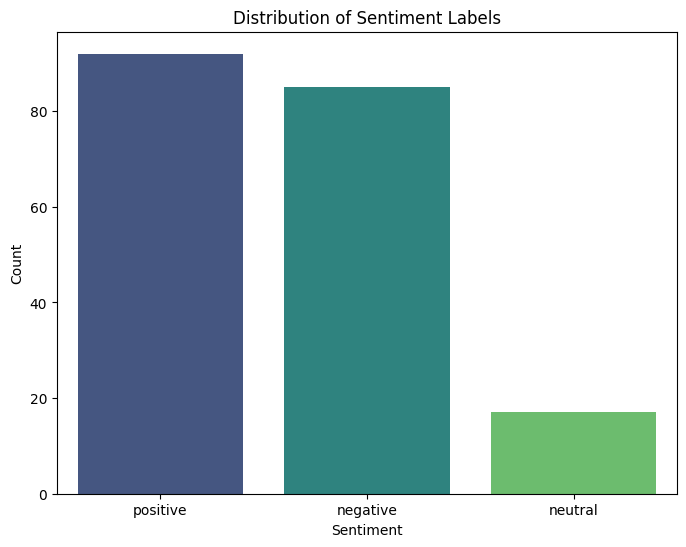

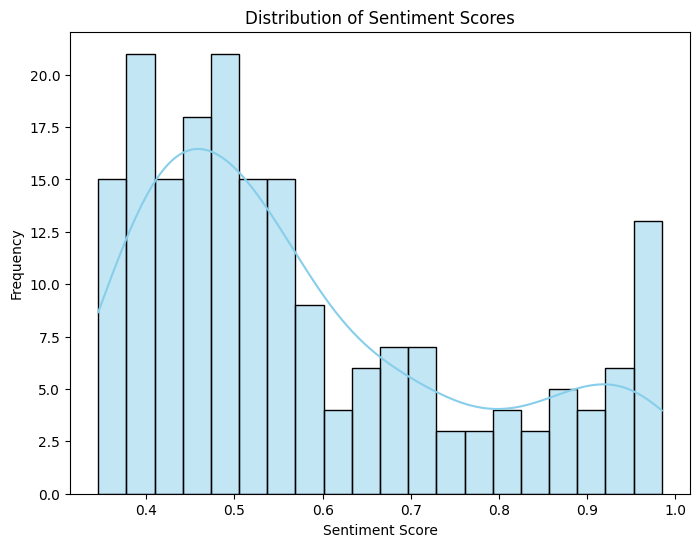

In [12]:
sentiment_analyzer_lxyuan = pipeline(model="lxyuan/distilbert-base-multilingual-cased-sentiments-student")
sentiments_lxyuan, scores_lxyuan = perform_sentiment_analysis(truncated_comments, sentiment_analyzer_lxyuan)
plot_sentiment_distribution(sentiments_lxyuan, scores_lxyuan)

### citizenlab/twitter-xlm-roberta-base-sentiment-finetunned

config.json:   0%|          | 0.00/992 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


Overall average sentiment score: 0.9345

Average sentiment score by sentiment type:


,score
sentiment,
Negative,0.753300
Neutral,0.953876
Positive,0.884170


/tmp/ipython-input-232627265.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=sentiment_df, palette='viridis')


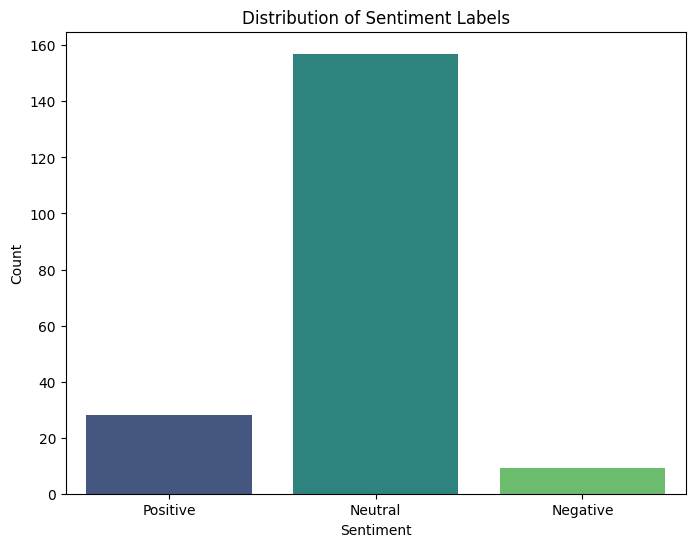

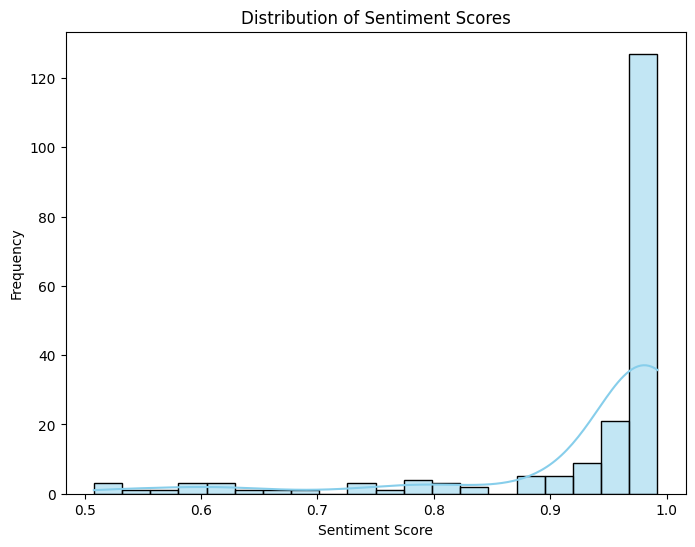

In [13]:
sentiment_analyzer_citizenlab = pipeline(model="citizenlab/twitter-xlm-roberta-base-sentiment-finetunned")
sentiments_citizenlab, scores_citizenlab = perform_sentiment_analysis(truncated_comments, sentiment_analyzer_citizenlab)
plot_sentiment_distribution(sentiments_citizenlab, scores_citizenlab)

## Comparação dos Resultados da Análise de Sentimentos com Visualizações

Comparação dos resultados da análise de sentimentos dos três modelos, observando as pontuações médias para cada categoria de sentimento e visualizando essas comparações.

Average sentiment score by model and sentiment type:


,model,sentiment,score
0,cardiffnlp,negative,0.660115
1,cardiffnlp,neutral,0.730606
2,cardiffnlp,positive,0.787691
3,citizenlab,negative,0.753300
4,citizenlab,neutral,0.953876
5,citizenlab,positive,0.884170
6,lxyuan,negative,0.526238
7,lxyuan,neutral,0.476189
8,lxyuan,positive,0.649899


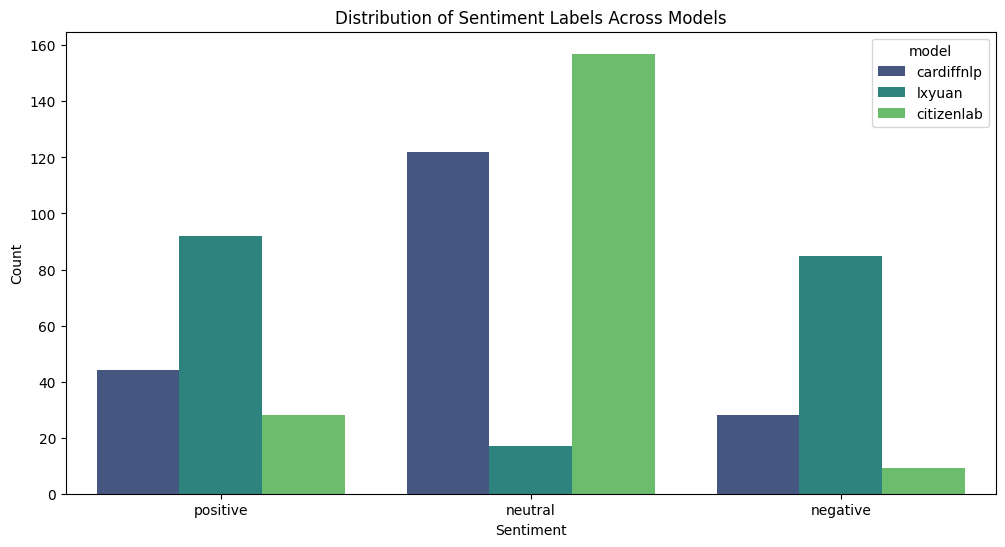

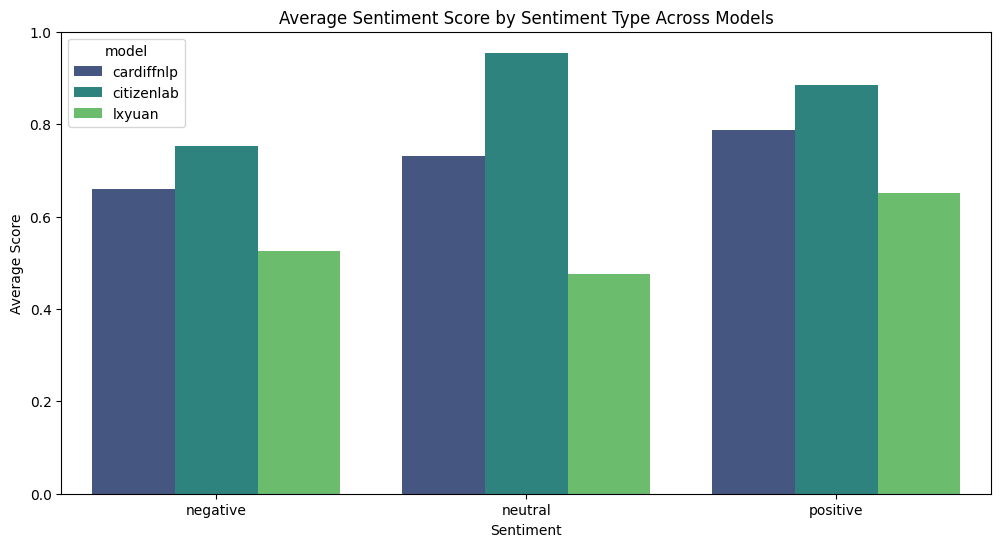

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criar DataFrames para os resultados de cada modelo
df_cardiffnlp = pd.DataFrame({'sentiment': sentiments_cardiffnlp, 'score': scores_cardiffnlp, 'model': 'cardiffnlp'})
df_lxyuan = pd.DataFrame({'sentiment': sentiments_lxyuan, 'score': scores_lxyuan, 'model': 'lxyuan'})
df_citizenlab = pd.DataFrame({'sentiment': sentiments_citizenlab, 'score': scores_citizenlab, 'model': 'citizenlab'})

# Converter rótulos de sentimento para minúsculas para o modelo do CitizenLab
df_citizenlab['sentiment'] = df_citizenlab['sentiment'].str.lower()

# Combinar the DataFrames
combined_df = pd.concat([df_cardiffnlp, df_lxyuan, df_citizenlab])

# Calcular as pontuações médias de sentimento por modelo e sentimento
average_scores_combined = combined_df.groupby(['model', 'sentiment'])['score'].mean().reset_index()

print("Average sentiment score by model and sentiment type:")
display(average_scores_combined)

# Visualizar a distribuição dos rótulos de sentimento entre os modelos
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', hue='model', data=combined_df, palette='viridis')
plt.title('Distribution of Sentiment Labels Across Models')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualizar as pontuações médias de sentimento por tipo de sentimento em todos os modelos
plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment', y='score', hue='model', data=average_scores_combined, palette='viridis')
plt.title('Average Sentiment Score by Sentiment Type Across Models')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.ylim(0, 1) # As pontuações de sentimento estão entre 0 e 1
plt.show()

## Pontuações médias globais de sentimento

Global average sentiment score across all models:


,sentiment,score
0,negative,0.573714
1,neutral,0.834418
2,positive,0.726865


/tmp/ipython-input-2585321134.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='score', data=global_average_scores, palette='viridis')


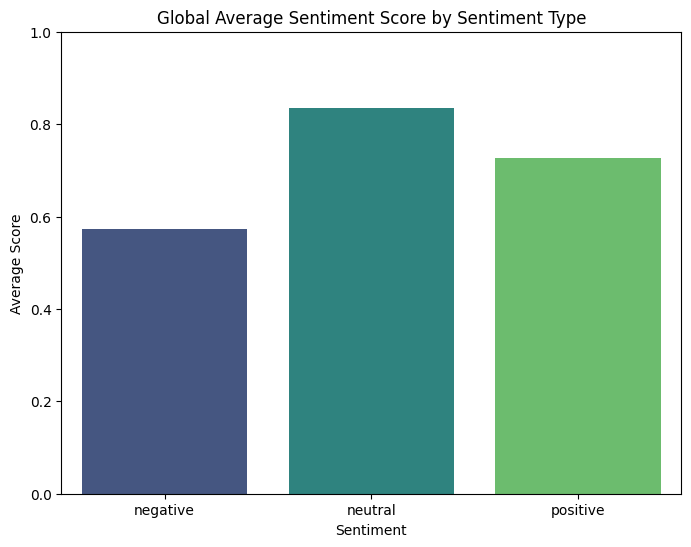

In [18]:
# Calculate the global average sentiment score for each sentiment type
global_average_scores = combined_df.groupby('sentiment')['score'].mean().reset_index()

print("Global average sentiment score across all models:")
display(global_average_scores)

# Visualize the global average sentiment scores
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment', y='score', data=global_average_scores, palette='viridis')
plt.title('Global Average Sentiment Score by Sentiment Type')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.ylim(0, 1) # Sentiment scores are between 0 and 1
plt.show()